<a href="https://colab.research.google.com/github/rakeshpawarg/iris-dataset/blob/main/blackfriday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Problem Statement-
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [5]:
df_train=pd.read_csv('train.csv')

In [6]:
df_test=pd.read_csv('test.csv')

In [7]:
df_train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [8]:
df_test.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN


In [9]:
df=df_train.append(df_test)

In [10]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549801 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     549801 non-null  int64  
 1   Product_ID                  549801 non-null  object 
 2   Gender                      549801 non-null  object 
 3   Age                         549801 non-null  object 
 4   Occupation                  549801 non-null  int64  
 5   City_Category               549801 non-null  object 
 6   Stay_In_Current_City_Years  549801 non-null  object 
 7   Marital_Status              549801 non-null  int64  
 8   Product_Category_1          549801 non-null  int64  
 9   Product_Category_2          379612 non-null  float64
 10  Product_Category_3          168245 non-null  float64
 11  Purchase                    316202 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 54.5+ MB


In [69]:
df.head(2)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0


In [13]:
df.drop(['User_ID'],axis=1,inplace=True)

In [14]:
df.drop(['Product_ID'],axis=1,inplace=True)

In [15]:
df.head(2)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0


Mapping Gender column here 

In [16]:
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [17]:
df.head(2)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,0,0-17,10,A,2,0,1,6.0,14.0,15200.0


In [18]:
df['Gender'].unique()

array([0, 1])

### Now on 'Age' column

In [19]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [20]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [21]:
df['Age'].unique()

array([1, 7, 3, 5, 6, 4, 2])

In [22]:
df.head(2)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0


Now,City_Category

In [23]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

get_dummies


In [24]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [25]:
df=pd.concat([df,df_city],axis=1)

In [26]:
df.head(2)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0


In [27]:
df.shape

(549801, 12)

Dropping 'City_Category'

In [28]:
df.drop('City_Category',axis=1,inplace=True)

In [29]:
df.head(2)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0


Missing **Values**

In [30]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            170189
Product_Category_3            381556
Purchase                      233599
B                                  0
C                                  0
dtype: int64

Product_Category_2

In [31]:
df['Product_Category_2'].unique()            

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [32]:
df['Product_Category_2'].mode()

0    8.0
dtype: float64

In [33]:
df['Product_Category_2'].mode()[0]

8.0

In [34]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [35]:
df['Product_Category_2'].unique() 

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

Done with replacing nan values with mode

In [36]:
df['Product_Category_2'].isnull().sum()

0

NOW,'Product_category_3'

In [37]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [38]:
df['Product_Category_3'].mode()

0    16.0
dtype: float64

In [39]:
df['Product_Category_3'].mode()[0]

16.0

In [40]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [41]:
df['Product_Category_3'].isnull().sum()

0

'Stay_In_Current_City_Years'

In [42]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

Replacing 4+ with 4

In [43]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [44]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549801 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      549801 non-null  int64  
 1   Age                         549801 non-null  int64  
 2   Occupation                  549801 non-null  int64  
 3   Stay_In_Current_City_Years  549801 non-null  object 
 4   Marital_Status              549801 non-null  int64  
 5   Product_Category_1          549801 non-null  int64  
 6   Product_Category_2          549801 non-null  float64
 7   Product_Category_3          549801 non-null  float64
 8   Purchase                    316202 non-null  float64
 9   B                           549801 non-null  uint8  
 10  C                           549801 non-null  uint8  
dtypes: float64(3), int64(5), object(1), uint8(2)
memory usage: 43.0+ MB


Converting 'Stay_In_Current_City_Years' to int

In [46]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549801 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      549801 non-null  int64  
 1   Age                         549801 non-null  int64  
 2   Occupation                  549801 non-null  int64  
 3   Stay_In_Current_City_Years  549801 non-null  int64  
 4   Marital_Status              549801 non-null  int64  
 5   Product_Category_1          549801 non-null  int64  
 6   Product_Category_2          549801 non-null  float64
 7   Product_Category_3          549801 non-null  float64
 8   Purchase                    316202 non-null  float64
 9   B                           549801 non-null  uint8  
 10  C                           549801 non-null  uint8  
dtypes: float64(3), int64(6), uint8(2)
memory usage: 43.0 MB


uint8 to int

In [48]:
df['B']=df['B'].astype(int)

In [49]:
df['C']=df['C'].astype(int)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549801 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      549801 non-null  int64  
 1   Age                         549801 non-null  int64  
 2   Occupation                  549801 non-null  int64  
 3   Stay_In_Current_City_Years  549801 non-null  int64  
 4   Marital_Status              549801 non-null  int64  
 5   Product_Category_1          549801 non-null  int64  
 6   Product_Category_2          549801 non-null  float64
 7   Product_Category_3          549801 non-null  float64
 8   Purchase                    316202 non-null  float64
 9   B                           549801 non-null  int64  
 10  C                           549801 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 50.3 MB


lets visualize

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


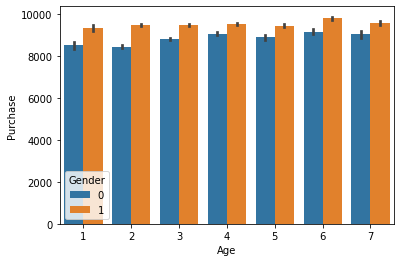

In [51]:
sns.barplot('Age','Purchase',hue='Gender',data=df)
plt.show()

Visualizing Product_category_1 vs Purchase

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


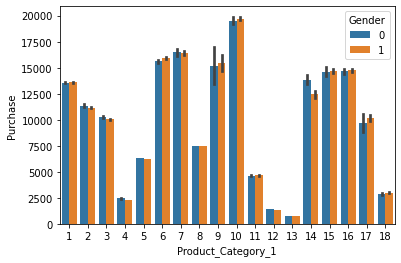

In [52]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


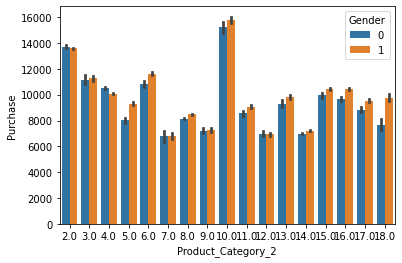

In [53]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


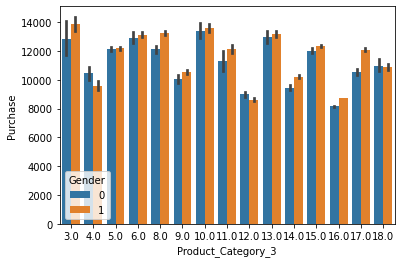

In [54]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

In [55]:
df.head(2)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0


In [56]:
df['Purchase'].isnull().sum()

233599

Showcasing all nan values of df['Purchase'] which will be our test data

In [57]:
df[df['Purchase'].isnull()]

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,0,4,1,4,1,5,14.0,16.0,NaN,1,0
3,0,4,1,4,1,4,9.0,16.0,NaN,1,0
4,0,3,1,1,0,4,5.0,12.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233594,0,3,15,4,1,8,8.0,16.0,NaN,1,0
233595,0,3,15,4,1,5,8.0,16.0,NaN,1,0
233596,0,3,15,4,1,1,5.0,12.0,NaN,1,0
233597,0,5,1,4,0,10,16.0,16.0,NaN,0,1


In [58]:
df_test=df[df['Purchase'].isnull()]

In [59]:
df_train=df[~df['Purchase'].isnull()]

In [ ]:
df_train.drop('Purchase',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
df_train

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
316197,0,3,3,3,0,5,8.0,16.0,1933.0,0,0
316198,0,3,3,3,0,5,8.0,16.0,8729.0,0,0
316199,0,3,3,3,0,5,14.0,16.0,3540.0,0,0
316200,0,3,3,3,0,16,8.0,16.0,8483.0,0,0


In [61]:
df_test

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,0,4,1,4,1,5,14.0,16.0,NaN,1,0
3,0,4,1,4,1,4,9.0,16.0,NaN,1,0
4,0,3,1,1,0,4,5.0,12.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233594,0,3,15,4,1,8,8.0,16.0,NaN,1,0
233595,0,3,15,4,1,5,8.0,16.0,NaN,1,0
233596,0,3,15,4,1,1,5.0,12.0,NaN,1,0
233597,0,5,1,4,0,10,16.0,16.0,NaN,0,1


feacture scaling

In [62]:
X=df_train.drop('Purchase',axis=1)

In [63]:
X.head(2)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0


In [65]:
X.shape

(316202, 10)

In [66]:
y=df_train['Purchase']

In [67]:
y.shape

(316202,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [ ]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [ ]:
#train ur model here on